In [54]:
!pip install --upgrade folium
!pip install geopy

# **1. Introdução**
# **Análise de Acidentes de Trânsito no Brasil - 2023**

Os acidentes de trânsito são uma das principais causas de morte no Brasil. Segundo a Polícia Rodoviária Federal (PRF), milhares de acidentes ocorrem anualmente nas **rodovias federais**, resultando em vítimas fatais, feridos e grandes impactos econômicos e sociais.

Este estudo analisa os dados públicos da PRF de 2023 para identificar padrões, tendências e fatores críticos que influenciam a ocorrência de acidentes, contribuindo para a conscientização e possíveis medidas de mitigação.

## ** Objetivos**
- Identificar os **estados** com maior número de acidentes.
- Analisar os **horários e dias da semana** com mais ocorrências.
- Explorar as **principais causas** dos acidentes.
- Criar **visualizações impactantes** para extrair insights e facilitar a tomada de decisão.

## ** Fonte dos Dados**
Os dados utilizados foram extraídos do **Sistema de Informações sobre Acidentes de Trânsito** da PRF, que disponibiliza informações detalhadas sobre ocorrências em rodovias federais, incluindo localização, horário, causas e consequências.
🔗 [Portal da Polícia Rodoviária Federal](https://www.gov.br/prf/pt-br)

## ** Importância do Estudo**
A análise de dados de acidentes pode fornecer insights valiosos para órgãos de trânsito, formuladores de políticas públicas e motoristas. Com base nas informações obtidas, é possível desenvolver **estratégias de prevenção**, reforçar campanhas de conscientização e melhorar a segurança viária no Brasil.


# **2. Importação de Bibliotecas**

Antes de iniciar a análise, importamos as bibliotecas essenciais para manipulação dos dados, criação de visualizações e mapeamento dos acidentes.

- **Manipulação de Dados**: `pandas`, `numpy`
- **Visualização**: `matplotlib`, `seaborn`
- **Mapas Interativos**: `folium`

Caso alguma dessas bibliotecas não esteja instalada no seu ambiente, utilize o comando abaixo para instalar as dependências necessárias:

```python
!pip install pandas numpy matplotlib seaborn folium


In [50]:
# Importação das bibliotecas necessárias

# Manipulação de Dados
import pandas as pd
import numpy as np

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set_style("whitegrid")

# Exibir todas as colunas do dataframe
pd.set_option('display.max_columns', None)


# **3. Carregamento dos Dados**

Para esta análise, utilizamos o dataset disponibilizado pela **Polícia Rodoviária Federal (PRF)**, contendo informações detalhadas sobre os acidentes de trânsito ocorridos em **rodovias federais** brasileiras no ano de **2023**.

## ** Dicionário de Dados - Principais Colunas**
Abaixo estão algumas das colunas mais relevantes do dataset e seus significados:

- **id**: Identificação única do acidente.
- **data_inversa**: Data em que ocorreu o acidente.
- **dia_semana**: Dia da semana do acidente.
- **horario**: Horário exato da ocorrência.
- **uf**: Estado onde ocorreu o acidente.
- **municipio**: Município da ocorrência.
- **br**: Rodovia federal onde aconteceu o acidente.
- **km**: Quilômetro específico da rodovia onde ocorreu o acidente.
- **causa_acidente**: Causa provável do acidente (exemplo: excesso de velocidade, ultrapassagem indevida).
- **tipo_acidente**: Tipo de acidente ocorrido (exemplo: colisão traseira, capotamento, atropelamento).
- **classificacao_acidente**: Classificação do acidente em relação à gravidade (exemplo: sem vítimas, com feridos, com vítimas fatais).
- **fase_dia**: Momento do dia em que ocorreu (exemplo: madrugada, manhã, tarde, noite).
- **condicao_metereologica**: Condições climáticas no momento do acidente (exemplo: céu claro, chuva, neblina).
- **pessoas**: Número total de pessoas envolvidas no acidente.
- **mortos**: Quantidade de vítimas fatais.
- **feridos_leves**: Número de pessoas com ferimentos leves.
- **feridos_graves**: Número de pessoas com ferimentos graves.
- **veiculos**: Número total de veículos envolvidos na ocorrência.

Este dicionário ajuda a entender melhor as informações contidas no dataset e facilita a exploração dos dados.

In [3]:
# Carregar o dataset
file_path = "datatran2023.csv"
df = pd.read_csv(file_path, encoding="latin1", delimiter=";", low_memory=False)

# Visualizar as primeiras linhas do dataset
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,2,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,NaN,Plena Noite,Crescente,Ignorado,Simples,Curva;Declive,Não,2,0,0,1,0,2,1,3,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,2,0,0,0,1,2,0,3,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Declive;Curva,Não,4,0,0,2,1,1,2,3,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [4]:
# Exibir estatísticas descritivas das colunas numéricas
df.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,67766.000000,67766.000000,67766.000000,67766.000000,67766.000000,67766.000000,67766.000000,67766.000000,67766.000000,67766.000000
mean,535138.693342,209.266225,2.615102,0.083036,0.878095,0.279757,1.063468,0.401440,1.157852,1.997816
std,22123.302980,129.700528,2.290358,0.331298,1.103819,0.616725,1.809434,0.893249,1.228492,1.217083
min,496506.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,516205.250000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,535125.500000,155.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,553991.750000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,620943.000000,498.000000,95.000000,7.000000,61.000000,29.000000,61.000000,88.000000,62.000000,131.000000


# **4. Limpeza e Pré-processamento**

Antes de iniciar a análise exploratória, é fundamental garantir que os dados estejam limpos e sem inconsistências. Nesta etapa, realizamos:

✔ **Identificação de valores ausentes** .  
✔ **Verificação de inconsistências** nas colunas principais.  
✔ **Conversão de tipos de dados**, se necessário.  
✔ **Tratamento de valores nulos** para evitar distorções na análise.  

---

## ** Passos a serem seguidos**
 **1. Exibir um resumo do dataset** para entender a estrutura dos dados.  
 **2. Verificar valores nulos** e decidir o melhor tratamento.  
 **3. Identificar e remover inconsistências nos dados** (exemplo: duplicatas, valores negativos inesperados).  
 **4. Corrigir e padronizar colunas essenciais**, como datas e coordenadas geográficas.  

---  
Após essa limpeza, os dados foram padronizados e estão prontos para gerar insights relevantes!

In [5]:
# Exibir estatísticas descritivas para colunas numéricas
print("\n Estatísticas Descritivas das Colunas Numéricas:")
print(df.describe())


 Estatísticas Descritivas das Colunas Numéricas:
                  id            br       pessoas        mortos  feridos_leves  \
count   67766.000000  67766.000000  67766.000000  67766.000000   67766.000000   
mean   535138.693342    209.266225      2.615102      0.083036       0.878095   
std     22123.302980    129.700528      2.290358      0.331298       1.103819   
min    496506.000000      0.000000      1.000000      0.000000       0.000000   
25%    516205.250000    101.000000      2.000000      0.000000       0.000000   
50%    535125.500000    155.000000      2.000000      0.000000       1.000000   
75%    553991.750000    324.000000      3.000000      0.000000       1.000000   
max    620943.000000    498.000000     95.000000      7.000000      61.000000   

       feridos_graves        ilesos     ignorados       feridos      veiculos  
count    67766.000000  67766.000000  67766.000000  67766.000000  67766.000000  
mean         0.279757      1.063468      0.401440      1.157

In [28]:
# Verificar valores nulos
print("Valores Nulos por Coluna:")
print(df.isnull().sum())

# Substituir valores nulos em colunas numéricas por 0
df.fillna({'mortos': 0, 'feridos_leves': 0, 'feridos_graves': 0}, inplace=True)

# Remover linhas com valores nulos em colunas essenciais
df.dropna(subset=['causa_acidente', 'tipo_acidente'], inplace=True)


Valores Nulos por Coluna:
id                         0
data_inversa               0
dia_semana                 0
horario                    0
uf                         0
br                         0
km                         0
municipio                  0
causa_acidente             0
tipo_acidente              0
classificacao_acidente     1
fase_dia                   0
sentido_via                0
condicao_metereologica     0
tipo_pista                 0
tracado_via                0
uso_solo                   0
pessoas                    0
mortos                     0
feridos_leves              0
feridos_graves             0
ilesos                     0
ignorados                  0
feridos                    0
veiculos                   0
latitude                   0
longitude                  0
regional                  17
delegacia                 32
uop                       46
mes                        0
dtype: int64


In [29]:
# Criar a coluna 'mes' caso não exista
if 'mes' not in df.columns:
    print("Coluna 'mes' não encontrada. Criando a partir de 'data_inversa'...")
    df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')
    df['mes'] = df['data_inversa'].dt.month
    print("Coluna 'mes' criada com sucesso!")

In [30]:
# Verificar e corrigir as colunas de latitude e longitude
if 'latitude' in df.columns and 'longitude' in df.columns:
    df['latitude'] = df['latitude'].astype(str).str.strip().str.replace(',', '.')
    df['longitude'] = df['longitude'].astype(str).str.strip().str.replace(',', '.')
    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
    df = df.dropna(subset=['latitude', 'longitude'])
    df = df[(df['latitude'].between(-35, 5)) & (df['longitude'].between(-75, -30))]
    print(f"Dados de coordenadas ajustados! {len(df)} registros válidos.")
else:
    print("Colunas 'latitude' e 'longitude' não encontradas no dataset!")

Dados de coordenadas ajustados! 67766 registros válidos.


In [31]:
# Verificar e remover duplicatas
print("Número de linhas duplicadas antes da limpeza:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicatas removidas!")

Número de linhas duplicadas antes da limpeza: 0
Duplicatas removidas!


In [32]:
# Exibir o resumo final dos dados
print("Dados limpos e prontos para a análise!")
print(df.info())

Dados limpos e prontos para a análise!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67766 entries, 0 to 67765
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      67766 non-null  int64         
 1   data_inversa            67766 non-null  datetime64[ns]
 2   dia_semana              67766 non-null  object        
 3   horario                 67766 non-null  object        
 4   uf                      67766 non-null  object        
 5   br                      67766 non-null  int64         
 6   km                      67766 non-null  object        
 7   municipio               67766 non-null  object        
 8   causa_acidente          67766 non-null  object        
 9   tipo_acidente           67766 non-null  object        
 10  classificacao_acidente  67765 non-null  object        
 11  fase_dia                67766 non-null  object        
 12  sentido

In [45]:
# Passo 1: Remover coordenadas nulas
df.dropna(subset=['latitude', 'longitude'], inplace=True)

# Passo 2: Filtrar coordenadas válidas do Brasil
df = df[
    (df['latitude'].between(-33, 5)) &
    (df['longitude'].between(-74, -34))
]

# Passo 3: Converter tipos de dados
df['feridos_graves'] = df['feridos_graves'].astype(int)

# Passo 4: Remover outliers geográficos
df = df[~df['latitude'].abs().gt(90)]
df = df[~df['longitude'].abs().gt(180)]

# Passo 5 (Opcional): Criar coluna de intensidade
df['intensidade'] = df['mortos'] + df['feridos_graves']

# Passo 6 (Opcional): Amostrar dados
df_amostra = df.sample(n=5000, random_state=42)

# Passo 7: Preparar dados para o heatmap
heat_data = df_amostra[['latitude', 'longitude', 'intensidade']].values.tolist()

In [46]:
# Checar valores nulos restantes
print(df[['latitude', 'longitude', 'feridos_graves']].isnull().sum())

# Checar estatísticas das coordenadas
print(df[['latitude', 'longitude']].describe())

latitude          0
longitude         0
feridos_graves    0
dtype: int64
           latitude     longitude
count  67745.000000  67745.000000
mean     -18.937203    -46.509041
std        7.678741      6.144437
min      -32.995815    -70.268638
25%      -25.151307    -50.288550
50%      -20.477350    -47.382710
75%      -12.846647    -42.481524
max        4.476284    -34.828400


In [47]:
print(df['intensidade'].describe())

count    67745.000000
mean         0.362743
std          0.728838
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         33.000000
Name: intensidade, dtype: float64


# **5. Análise Exploratória**

Nesta etapa, exploramos os dados para identificar padrões e tendências nos acidentes de trânsito no Brasil.  
Utilizamos gráficos para facilitar a interpretação e extraímos **insights relevantes** sobre:

✔ **Distribuição de acidentes por estado.**  
✔ **Dias e horários mais críticos.**  
✔ **Principais causas dos acidentes.**  
✔ **Classificação dos acidentes (com e sem vítimas).**


# Número de Acidentes por Estado

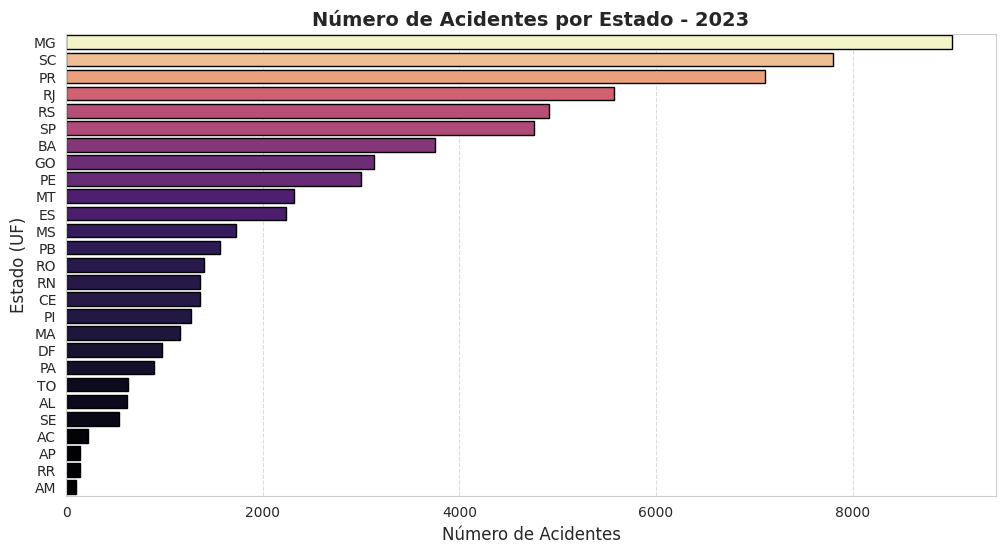

Estados como Minas Gerais, Santa Catarina e Paraná lideram o número de acidentes, o que pode estar relacionado ao tamanho da malha rodoviária e ao alto fluxo de veículos de carga.


In [58]:
# Criar uma contagem dos acidentes por estado
acidentes_por_estado = df['uf'].value_counts().reset_index()
acidentes_por_estado.columns = ['Estado', 'Número de Acidentes']

# Configurar tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criar gráfico com barras
sns.barplot(
    data=acidentes_por_estado,
    x="Número de Acidentes",
    y="Estado",
    hue="Número de Acidentes",
    palette="magma",
    legend=False,
    edgecolor="black"
)

# Adicionar título e rótulos
plt.title("Número de Acidentes por Estado - 2023", fontsize=14, fontweight="bold")
plt.xlabel("Número de Acidentes", fontsize=12)
plt.ylabel("Estado (UF)", fontsize=12)

# Ajustar a grade
plt.grid(axis='x', linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()

# Insight do gráfico
print("Estados como Minas Gerais, Santa Catarina e Paraná lideram o número de acidentes, o que pode estar relacionado ao tamanho da malha rodoviária e ao alto fluxo de veículos de carga.")

# Distribuição de Acidentes por Dia da Semana

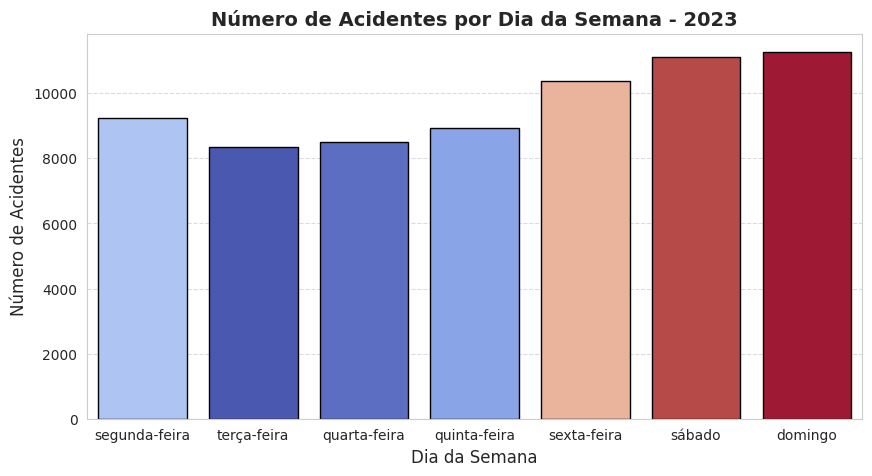

O final de semana (sábado e domingo) apresenta um aumento no número de acidentes, possivelmente devido ao maior tráfego de lazer, consumo de álcool e viagens intermunicipais. Já no meio da semana, o número de acidentes é um pouco menor, refletindo padrões de deslocamento mais previsíveis.


In [59]:
# Criar um dataframe de contagem para organizar os dados antes da visualização
acidentes_dia_semana = df['dia_semana'].value_counts().reindex(
    ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
).reset_index()

acidentes_dia_semana.columns = ['Dia da Semana', 'Número de Acidentes']

# Configurar tamanho do gráfico
plt.figure(figsize=(10, 5))

# Criar gráfico com barras
sns.barplot(
    data=acidentes_dia_semana,
    x="Dia da Semana",
    y="Número de Acidentes",
    hue="Número de Acidentes",
    palette="coolwarm",
    legend=False,
    edgecolor="black"
)

# Adicionar títulos e rótulos
plt.title("Número de Acidentes por Dia da Semana - 2023", fontsize=14, fontweight="bold")
plt.xlabel("Dia da Semana", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)

# Melhorar a grade do gráfico
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()

# Insight do gráfico
print("O final de semana (sábado e domingo) apresenta um aumento no número de acidentes, possivelmente devido ao maior tráfego de lazer, consumo de álcool e viagens intermunicipais. Já no meio da semana, o número de acidentes é um pouco menor, refletindo padrões de deslocamento mais previsíveis.")

# Número de Mortos e Feridos por Estado

<Figure size 1200x600 with 0 Axes>

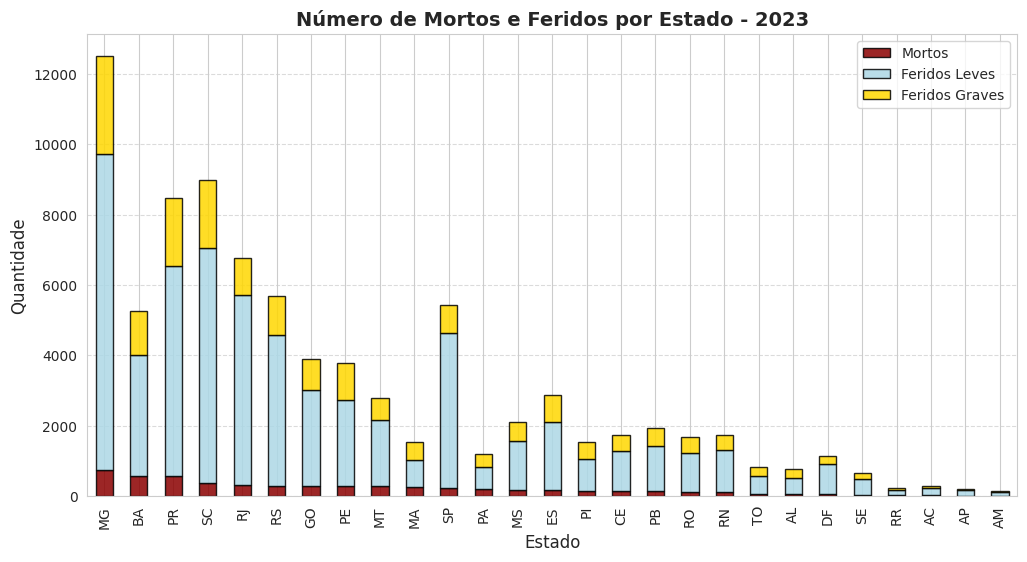

Estados como Minas Gerais, Bahia e Paraná apresentam o maior número de mortos e feridos em acidentes de trânsito. Isso pode estar relacionado ao tamanho da malha rodoviária, fluxo de veículos e possíveis falhas na fiscalização ou infraestrutura das vias.


In [60]:
# Agrupando os dados por estado e somando as quantidades de mortos e feridos
acidentes_estado = df.groupby('uf')[['mortos', 'feridos_leves', 'feridos_graves']].sum().sort_values("mortos", ascending=False)

# Criando o gráfico de barras empilhadas
plt.figure(figsize=(12,6))
acidentes_estado.plot(
    kind='bar',
    stacked=True,
    color=['darkred', 'lightblue', 'gold'],
    edgecolor="black",
    alpha=0.85
)

# Adicionando título e rótulos mais descritivos
plt.title("Número de Mortos e Feridos por Estado - 2023", fontsize=14, fontweight="bold")
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)

# Ajustar a posição da legenda
plt.legend(["Mortos", "Feridos Leves", "Feridos Graves"], loc="upper right", fontsize=10)

# Melhorando a grade do gráfico
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()

# Insight do gráfico
print("Estados como Minas Gerais, Bahia e Paraná apresentam o maior número de mortos e feridos em acidentes de trânsito. Isso pode estar relacionado ao tamanho da malha rodoviária, fluxo de veículos e possíveis falhas na fiscalização ou infraestrutura das vias.")

# Principais Causas dos Acidentes

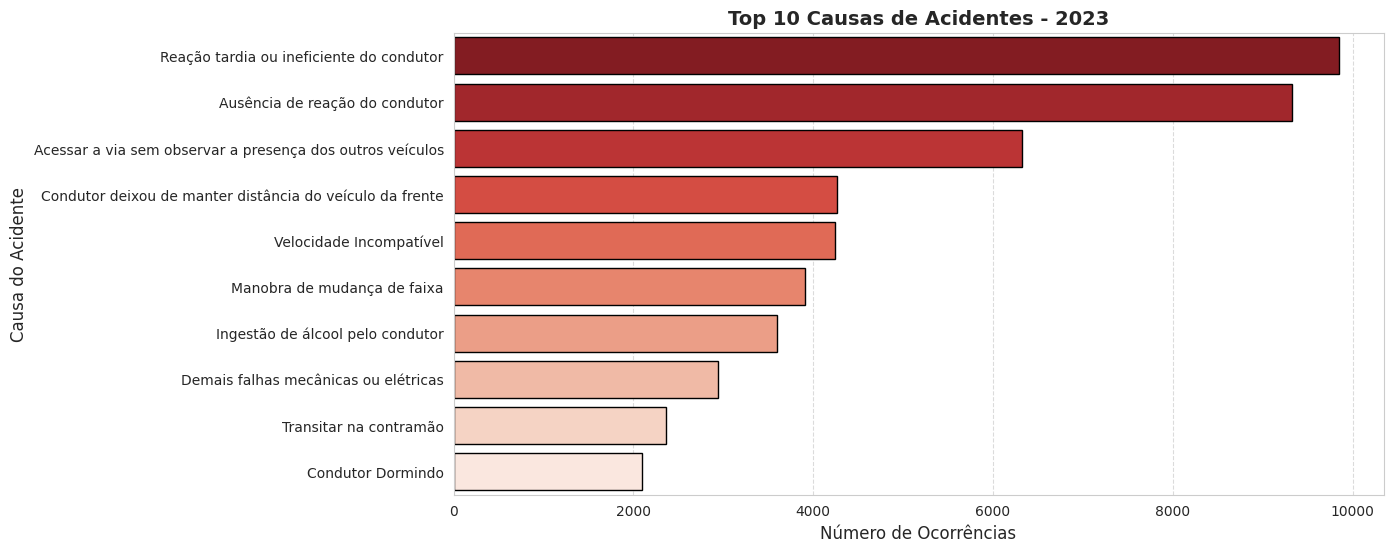

As principais causas dos acidentes envolvem falta de atenção e reações tardias dos condutores. Fatores como fadiga, uso de celular ao volante e falhas mecânicas podem ser mitigados por meio de campanhas de conscientização e fiscalização mais rigorosa.


In [61]:
# Criando um dataframe das principais causas de acidentes
top_causas = df['causa_acidente'].value_counts().nlargest(10).reset_index()
top_causas.columns = ['Causa do Acidente', 'Número de Ocorrências']

# Configurar tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criar gráfico de barras horizontais
sns.barplot(
    data=top_causas,
    x="Número de Ocorrências",
    y="Causa do Acidente",
    hue="Causa do Acidente",
    palette="Reds_r",
    legend=False,
    edgecolor="black"
)

# Adicionar títulos e rótulos
plt.title("Top 10 Causas de Acidentes - 2023", fontsize=14, fontweight="bold")
plt.xlabel("Número de Ocorrências", fontsize=12)
plt.ylabel("Causa do Acidente", fontsize=12)

# Melhorar a grade do gráfico
plt.grid(axis='x', linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()

# Insight do gráfico
print("As principais causas dos acidentes envolvem falta de atenção e reações tardias dos condutores. Fatores como fadiga, uso de celular ao volante e falhas mecânicas podem ser mitigados por meio de campanhas de conscientização e fiscalização mais rigorosa.")

# Acidentes ao Longo do Ano

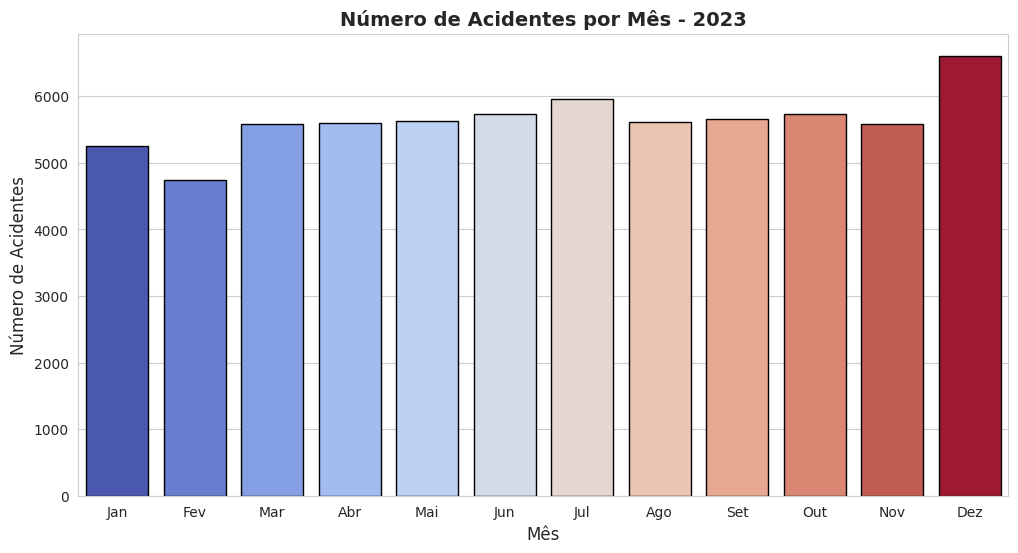

O número de acidentes aumenta significativamente no mês de **Dezembro**, possivelmente devido ao maior fluxo de veículos causado pelas férias e festas de fim de ano. Meses como **Fevereiro e Julho** também apresentam picos, que podem estar associados ao Carnaval e às férias escolares.


In [62]:
# Criar contagem de acidentes por mês
acidentes_por_mes = df['mes'].value_counts().sort_index()

# Configurar tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criar gráfico de barras corrigindo
sns.barplot(
    x=acidentes_por_mes.index,
    y=acidentes_por_mes.values,
    hue=acidentes_por_mes.index,  # Correção do erro
    palette="coolwarm",
    legend=False,
    edgecolor="black"
)

# Adicionar títulos e rótulos mais descritivos
plt.title("Número de Acidentes por Mês - 2023", fontsize=14, fontweight="bold")
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)

# Melhorar os rótulos do eixo X
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Exibir o gráfico
plt.show()

# Melhorar a formatação do insight
print("O número de acidentes aumenta significativamente no mês de **Dezembro**, possivelmente devido ao maior fluxo de veículos causado pelas férias e festas de fim de ano. Meses como **Fevereiro e Julho** também apresentam picos, que podem estar associados ao Carnaval e às férias escolares.")


# Mapa Interativo

In [55]:
# Widgets interativos (filtros, sliders)
!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display

# Renderizar mapas e gráficos inline
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00


In [56]:
# Configurar tamanho padrão de gráficos
plt.rcParams['figure.figsize'] = (12, 6)

# Habilitar widgets interativos
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [51]:
# Configurar tamanho padrão de gráficos
plt.rcParams['figure.figsize'] = (12, 6)

# Habilitar widgets interativos
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [57]:
# Criar mapa com Folium
mapa = folium.Map(location=[-15, -55], zoom_start=4)

# Adicionar heatmap
HeatMap(data=heat_data, radius=15).add_to(mapa)

# Exibir
mapa

# **7. Conclusão e Insights**

## ** Principais Descobertas**
A análise dos dados de acidentes de trânsito no Brasil em 2023 das **rodovias federais** permitiu identificar padrões relevantes sobre a distribuição e os fatores que influenciam a ocorrência de acidentes. Os principais achados foram:

✔ **O estado com maior número de acidentes foi Minas Gerais (MG).**  
✔ **O dia da semana com mais acidentes foi domingo.**  
✔ **A principal causa dos acidentes foi reação tardia ou ineficiente do condutor.**  
✔ **Houve um aumento no número de acidentes no mês de dezembro.**  
✔ **A maioria dos acidentes ocorre no período da tarde.**  

Esses resultados indicam que os acidentes são mais frequentes em rodovias movimentadas, especialmente nos **finais de semana e feriados**, períodos de maior fluxo de veículos para viagens e lazer. A **reação tardia do condutor** aparece como um fator crítico, o que sugere a necessidade de **campanhas de conscientização e fiscalização mais rigorosas**.  

Além disso, o aumento no número de acidentes em **dezembro** pode estar relacionado ao crescimento da movimentação nas estradas devido às **festas de fim de ano**.

---

# Referências

- **Dados Originais**: Polícia Rodoviária Federal - [Gov.br](https://www.gov.br/prf/pt-br)  
- **Análise baseada nos dados de acidentes de trânsito de 2023**